In [16]:
import os
import zipfile
import shutil
from pathlib import Path

root = Path(os.getcwd()).absolute()
print(f"cwd: {root}")
src = root / "world_autosave_20220917102459.zip"
dst = src.parent / f"{src.stem}"

if dst.exists():
    print(f"Deleting existing unzipped folder and contents {dst.name}")
    shutil.rmtree(dst)
with zipfile.ZipFile(src, 'r') as zip_ref:
    print(f"Unzipping save-file to {dst.name}")
    zip_ref.extractall(dst)


cwd: G:\code\bibite-scripts
Deleting existing unzipped folder and contents world_autosave_20220917102459
Unzipping save-file to world_autosave_20220917102459


In [17]:
import bibite_scripts as bb

bibites = []
for bf in (dst / "bibites").iterdir():
    data = bb.bb8.read(bf)
    bibites.append(data)

import numpy as np    

def get_gene_array(name: str):
    return np.array([x["genes"]["genes"][name] for x in bibites])


In [18]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_gene(name: str):
    plt.title(name)
    a = get_gene_array(name)
    plt.xlabel(f"Population {len(a)}")
    plt.ylabel("Value")
    plt.plot(np.sort(a))
    plt.show()

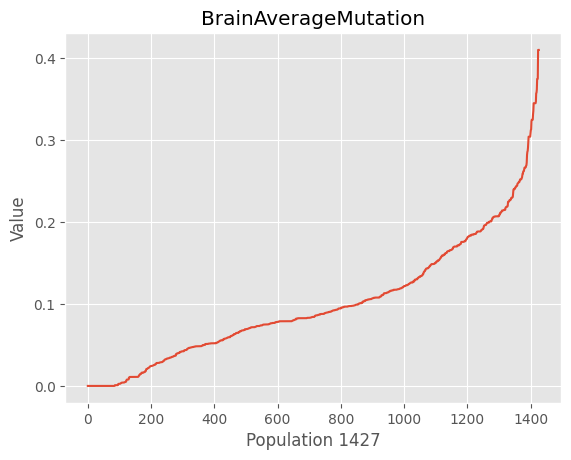

In [19]:
plot_gene("BrainAverageMutation")

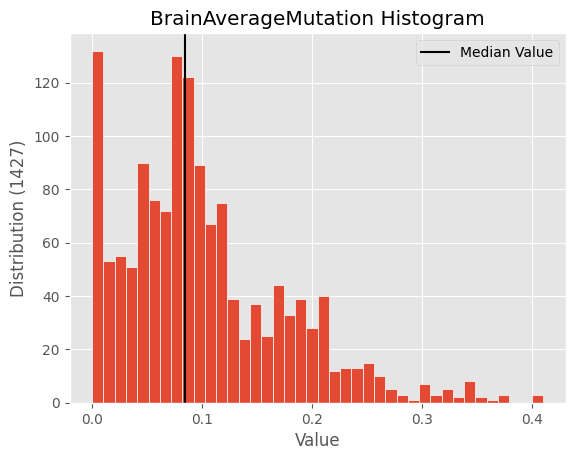

In [20]:
def hist(name, bins=20):
    a = get_gene_array(name)
    plt.hist(a, bins=bins, edgecolor='white')
    plt.axvline(np.median(a), color='black', label="Median Value")
    plt.xlabel("Value")
    plt.ylabel(f"Distribution ({len(a)})")
    plt.title(f"{name} Histogram")
    plt.legend()
    plt.show()
hist("BrainAverageMutation", bins=40)

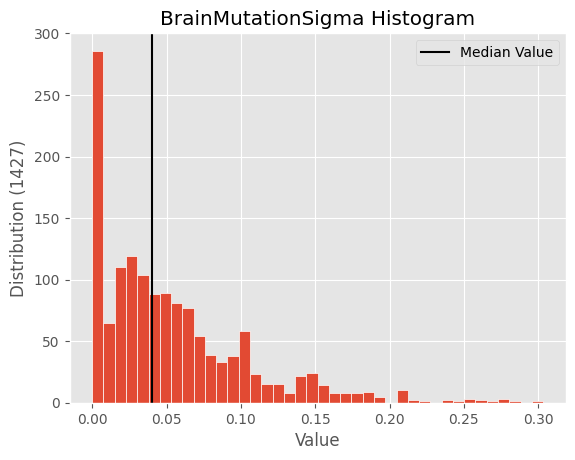

In [21]:
hist("BrainMutationSigma", bins=40)

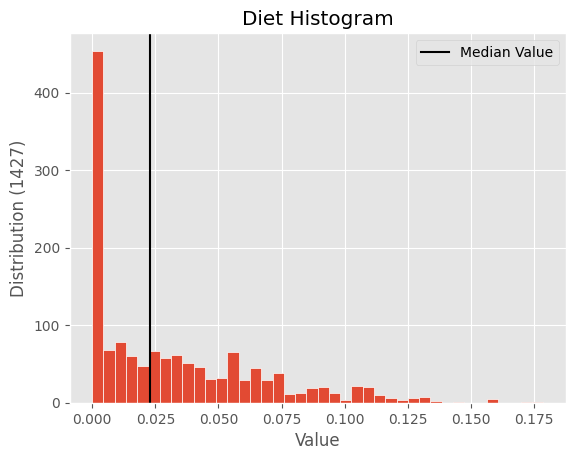

In [22]:
hist("Diet", bins=40)

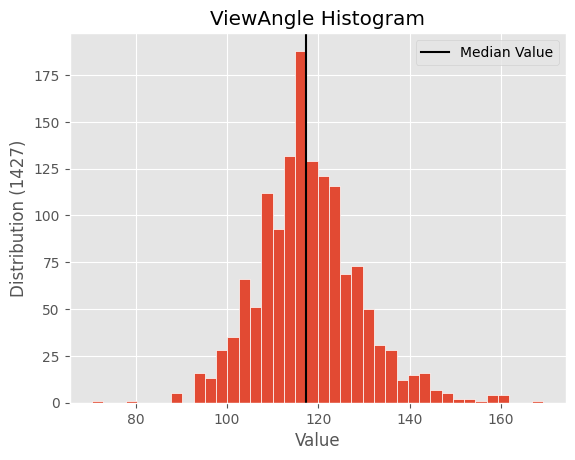

In [23]:
hist("ViewAngle", bins=40)

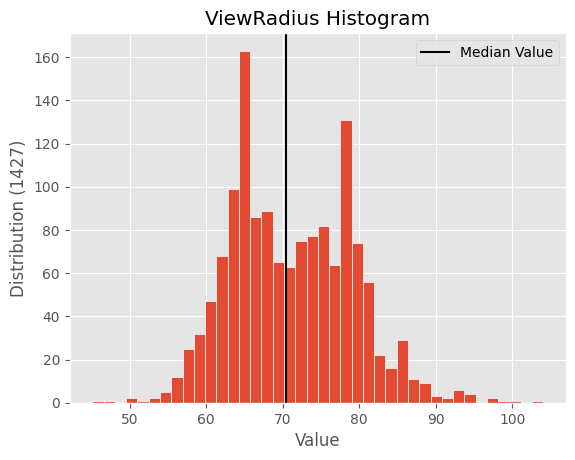

In [24]:
hist("ViewRadius", bins=40)